## Visualisation des datasets CAIDA

Ce notebook se propose de visualiser les datasets de CAIDA, pour estimer la pertinence de ces jeux de données.

In [1]:
# Importations diverses
import pandas as pd
import os
import numpy as np
import bz2
import pickle

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### 1° Pertinence des as-relationships
données accessibles sur : https://publicdata.caida.org/datasets/as-relationships/serial-2/

Le DataFrame `dataset_features` contient les *informations-clé* des datasets, c-à-d :
- Un timestamp (*YYYYMMDD*) : **date**
- Le nombre d'AS du dataset : **number_AS**
- Le nombre de Peering links : **number_p2p_links**
- Le nombre de provider-customer links : **number_p2c_links**

In [2]:
# DataFrame panda contenant les informations-clé de chaque data
dataset_features = pd.read_csv('data/CAIDA_AS_RELATIONSHIP/number_AS_p2p_c2p_over_time.txt')
dataset_features['timestamp'] = dataset_features['timestamp'].map(str)

dataset_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   timestamp         26 non-null     object
 1   number_AS         26 non-null     int64 
 2   number_p2p_links  26 non-null     int64 
 3   number_p2c_links  26 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 960.0+ bytes


In [4]:
dataset_features.head()

,timestamp,number_AS,number_p2p_links,number_p2c_links
0,20181101,62995,492469,123549
1,20181201,63365,461675,124793
2,20190101,63467,463959,124682
3,20190201,63864,471684,125977
4,20190301,64167,447820,126621


In [11]:
# Ajout d'une colonne date 'normalisée', en transformant le YYYYMMDD
first_year = dataset_features['timestamp'][0][0:4]
first_month = dataset_features['timestamp'][0][4:6]

list_years = list(dataset_features['timestamp'].map(lambda string: string[0:4]))
#print("First month : " + first_month)
#print("First year : " + first_year)

###################################################################################
# Fonction qui définit la date de chaque dataset en f° de la date du 1er dataset
# (year - year_initial) * 12 + (month - month_initial)
###################################################################################
def date_abscisses(date):
    return (int(date[0:4]) - int(first_year))* 12 + int(date[4:6]) - int(first_month)

# Création de la liste des dates mise à l'échelle sous forme d'un entier
iterator = map(date_abscisses, list(dataset_features['timestamp']))

dataset_features['scaled_date'] = list(iterator)
dataset_features.head()

,timestamp,number_AS,number_p2p_links,number_p2c_links,scaled_date
0,20181101,62995,492469,123549,0
1,20181201,63365,461675,124793,1
2,20190101,63467,463959,124682,2
3,20190201,63864,471684,125977,3
4,20190301,64167,447820,126621,4
5,20190401,64553,471771,128731,5
6,20190501,64758,478446,129399,6
7,20190601,65082,483965,129824,7
8,20190701,65440,375736,129836,8
9,20190801,65724,361719,130120,9


In [6]:
# Création d'une liste d'années pour un meilleur plot du numbre d'AS

years_to_plot = ["" for i in range(len(list_years))]
pattern_year = ""
for j in range (len(list_years)):
    if (list_years[j] != pattern_year):
        years_to_plot[j] = list_years[j]
        pattern_year = list_years[j]

#print("years to plot : " + str(years_to_plot))

assert (len(list_years) == len(years_to_plot))

- #### Number of AS over time

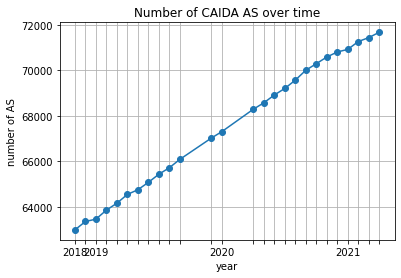

In [7]:
# Plot via matplotlib des nb AS

plt.xticks(dataset_features['scaled_date'], years_to_plot)
plt.plot(dataset_features['scaled_date'], dataset_features['number_AS'], '-o')
plt.grid(True)
plt.xlabel('year')
plt.ylabel('number of AS')
plt.title('Number of CAIDA AS over time')
plt.show()

- #### Number of link types over time

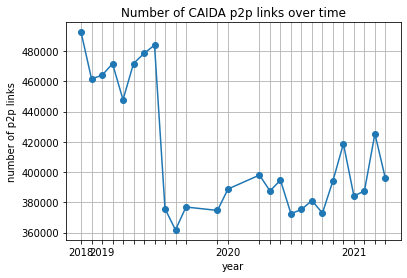

In [8]:
# Plot via matplotlib des nb p2p

plt.xticks(dataset_features['scaled_date'], years_to_plot)
plt.plot(dataset_features['scaled_date'], dataset_features['number_p2p_links'], '-o')
plt.grid(True)
plt.xlabel('year')
plt.ylabel('number of p2p links')
plt.title('Number of CAIDA p2p links over time')
plt.show()

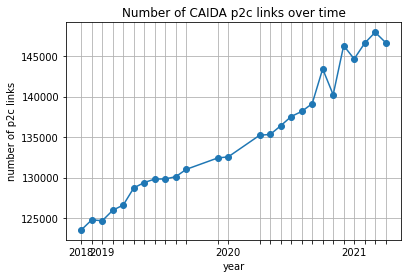

In [9]:
# Plot via matplotlib des nb p2c

plt.xticks(dataset_features['scaled_date'], years_to_plot)
plt.plot(dataset_features['scaled_date'], dataset_features['number_p2c_links'], '-o')
plt.grid(True)
plt.xlabel('year')
plt.ylabel('number of p2c links')
plt.title('Number of CAIDA p2c links over time')
plt.show()

### 2° Pertinence des as-classification
données accessibles sur : https://publicdata.caida.org/datasets/as-classification_restricted/ <br> <br>

Le DataFrame `dataset_classif` contient des informations concernant la classification des *AS* par CAIDA

In [10]:
# DataFrame panda contenant les informations-clé de chaque data
dataset_classif = pd.read_csv('data/CAIDA_AS_RELATIONSHIP/number_AS_p2p_c2p_over_time.txt')
dataset_features['timestamp'] = dataset_features['timestamp'].map(str)

dataset_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   timestamp         26 non-null     object
 1   number_AS         26 non-null     int64 
 2   number_p2p_links  26 non-null     int64 
 3   number_p2c_links  26 non-null     int64 
 4   scaled_date       26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


- #### Nous allons afficher le changement de labélisation d'AS de CAIDA en fonction du temps

In [92]:
print(os.popen("cd data/CAIDA_AS_CLASSIFICATION && ls").read())

20181101.as2types.txt
20181201.as2types.txt
20190101.as2types.txt
20190201.as2types.txt
20190301.as2types.txt
20190401.as2types.txt
20190501.as2types.txt
20190601.as2types.txt
20190701.as2types.txt
20190801.as2types.txt
20190901.as2types.txt
20191201.as2types.txt
20200101.as2types.txt
20200201.as2types.txt
20200301.as2types.txt
20200401.as2types.txt
20200401.as2types2.txt
20200501.as2types.txt
20200501.as2types2.txt
20200601.as2types.txt
20200701.as2types.txt
20200801.as2types.txt
20200901.as2types.txt
20201001.as2types.txt
20201101.as2types.txt
20201201.as2types.txt
20210101.as2types.txt
20210201.as2types.txt
20210301.as2types.txt
20210401.as2types.txt
as_04_05.txt
as_05_04.txt
LIST_AS_CLASSIFIED_20200101.txt
LIST_AS_UNCLASSIFIED_20200101.txt



In [96]:
PATH='data/CAIDA_AS_CLASSIFICATION/'
FILE1='20200401.as2types.txt'
FILE2=''

- La commande `comm -23 file1 file2` donne en output les AS de *file1* qui sont classifié **différemment** dans *file2*
  On retrouve :
  - Les AS de *file1* qui sont labélisés différemment dans *file2*
  - Les AS de *file1* qui n'existent pas dans *file2* <br>(par exemple *file1* est plus récent au niveau du dataset, donc il a plus d'AS qui ne sont pas forcément présent dans *file2*)

- La commande `cat file1 file2 file1 | sort -h | uniq --unique` donne les lignes présentes dans *file1* mais pas dans *file2*
    - Par exemple `cat dataset_i dataset_i+1 dataset_i | sort -h | uniq --unique` donne les AS présents dans le `dataset_i+1` mais pas dans le `dataset_i` ==> les nouveaux AS

In [29]:
# ---------------------------------------------------------------------------------------#
# Fonction qui crée le fichier des différences de classification entre 2 jeux de données #
# dataset_i et dataset_i+1                                                               #
# ---------------------------------------------------------------------------------------#

# 2 types de différences : 
#     1. un AS dont label(AS)_i != label(AS)_i+1
#     2. un AS qui n'est présent que dans le dataset i+1
def create_file_diff(dataset_i, dataset_i_plus_1, namefile):
    create_file = os.popen("comm -23 %s %s | sort -h  > data/as_04_05.txt" %dataset_i %dataset_i_plus_1).read()


In [110]:
#-----------------------------------------------------#
# Fonction qui renvoie la liste des ASN d'un dataset  #
#-----------------------------------------------------#

def list_ASN(dataset_i):
    var = os.popen("cat %s | grep \"^[0-9][0-9]*\" | cut -d \"|\" -f 1" % (dataset_i)).read()
    return var.split("\n")

In [107]:
#------------------------------------------------------------------------------------#
# Fonction qui renvoie la liste des AS ajoutés/supprimés entre les datasets i et i+1 #
#------------------------------------------------------------------------------------#

def list_AS_disappeared(dataset_i, dataset_i_plus_1):
    pathfile=str(dataset_i).split('.')[0] + "_list_AS.txt"
    print(pathfile)
    #var = os.popen("cat %s | grep \"^[0-9][0-9]*\" | cut -d \"|\" -f 1 > %s" % (dataset_i, pathfile)).read()
    var = os.popen("cat %s | grep \"^[0-9][0-9]*\" | cut -d \"|\" -f 1" % (dataset_i)).read()
    return var.split("\n")

In [117]:
liste_ASN = list_ASN(PATH + FILE1)
print(len(liste_ASN))

68290


In [118]:
print(os.popen("cd data/CAIDA_AS_CLASSIFICATION/ && ls").read())

20181101.as2types.txt
20181201.as2types.txt
20190101.as2types.txt
20190201.as2types.txt
20190301.as2types.txt
20190401.as2types.txt
20190501.as2types.txt
20190601.as2types.txt
20190701.as2types.txt
20190801.as2types.txt
20190901.as2types.txt
20191201.as2types.txt
20200101.as2types.txt
20200201.as2types.txt
20200301.as2types.txt
20200401.as2types.txt
20200401.as2types2.txt
20200401_list_AS.txt
20200501.as2types.txt
20200501.as2types2.txt
20200601.as2types.txt
20200701.as2types.txt
20200801.as2types.txt
20200901.as2types.txt
20201001.as2types.txt
20201101.as2types.txt
20201201.as2types.txt
20210101.as2types.txt
20210201.as2types.txt
20210301.as2types.txt
20210401.as2types.txt
as_04_05.txt
as_05_04.txt
LIST_AS_CLASSIFIED_20200101.txt
LIST_AS_UNCLASSIFIED_20200101.txt

